In [1]:
import numpy as np

In [2]:
arr = np.array([1,2,3,4,5,6,7,8,9])

In [3]:
arr

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
%%timeit  # 속도 테스트
np.where(arr % 2 == 0, arr, 999)             # 첫번째 파라미터로 

1.91 µs ± 7.63 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [13]:
%time
# 위에 꺼는 리스트컴프레이션으로
[a if a % 2 == 0 else 999 for a in arr]

CPU times: total: 0 ns
Wall time: 0 ns


[999, 2, 999, 4, 999, 6, 999, 8, 999]

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
crab = pd.read_csv('https://raw.githubusercontent.com/boringariel/scikit-learn/master/Data/CrabAgePrediction.csv') #, sep=',') #CrabAgePrediction.csv
#crab = pd.read_csv('../../Downloads/CrabAgePrediction.csv')

<Axes: xlabel='Age', ylabel='Length'>

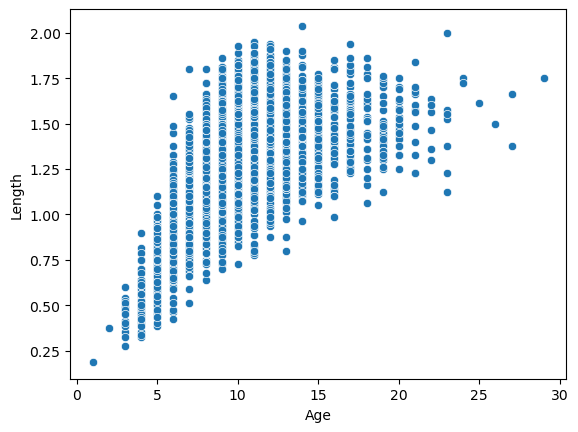

In [16]:
sns.scatterplot(data=crab, x='Age', y='Length')

In [17]:
from scipy import stats

In [18]:
r, p = stats.pearsonr(crab['Age'],crab['Length']) # statistic 추세선의 기울기 pvalue 거의 0 통계적으로 무의미하다.

In [19]:
r

0.5549732839723359

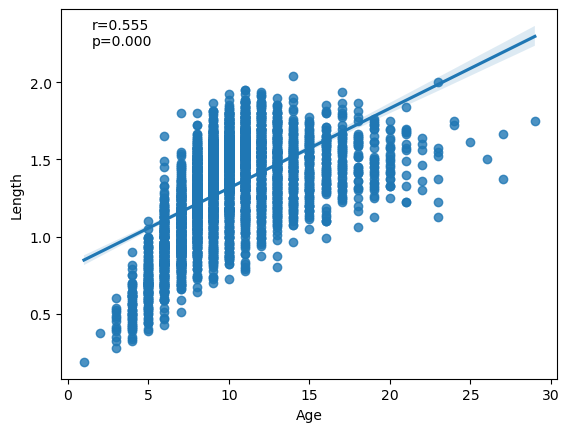

In [20]:
sns.regplot(data=crab, x='Age', y='Length')
plt.text(crab['Age'].min()+0.5, crab['Length'].max()+0.2, 'r=%0.3f\np=%0.3f'%(r,p)) # 쿼릴레스아그식스 correlation analysis visualization
plt.show()

In [21]:
stats.pearsonr(crab['Age'],crab['Length'])        # 크게 상관관계가 없다고 말할수 있다.

PearsonRResult(statistic=0.5549732839723359, pvalue=1.9699194608e-313)

In [22]:
stats.spearmanr(crab['Age'],crab['Length'])

SignificanceResult(statistic=0.5980206341219999, pvalue=0.0)

In [23]:
import openpyxl 

In [24]:
wb = openpyxl.load_workbook('../../Downloads/BestSellerList.xlsx')

In [26]:
sheet_names = wb.get_sheet_names() # 시트 네임을 불러온다

C:\Users\user\AppData\Local\Temp\ipykernel_1860\2238553351.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  sheet_names = wb.get_sheet_names() # 시트 네임을 불러온다


In [27]:
sheet_names

['베스트셀러 목록 Excel']

In [31]:
sheet = wb.get_sheet_by_name('베스트셀러 목록 Excel') # 해당 시트를 

C:\Users\user\AppData\Local\Temp\ipykernel_1860\799110620.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = wb.get_sheet_by_name('베스트셀러 목록 Excel') # 해당 시트를


In [38]:
sheet['A1'].value                 # 인덱싱도 가능 

'월'

In [33]:
sheet.cell(row=1, column=1).value #  ROW 컬럼 순서로 /// 안보면서 작업 해당셀에 보고 있으면 편집한다 & EX) C11번에 잇으면 해당 셀을 편집한다

'월'

In [34]:
df = pd.DataFrame(sheet.values)

In [35]:
df

,0,1,2,3,4,5,6,7,8,9
0,월,순위,도서명,저자,출판사,출판 일자,정가,적립포인트,대분야,ISBN
1,2021년,1,달러구트 꿈 백화점(레인보우 에디션),이미예,팩토리나인,20200708,13800,690,판타지소설,9791165341909
2,2021년,2,주린이가 가장 알고 싶은 최다질문 TOP 77(교보 단독 리커버),염승환,메이트북스,20210726,18000,900,주식투자,9791160023459
3,2021년,3,미드나잇 라이브러리(평행우주 에디션),매트 헤이그,인플루엔셜,20210428,15800,790,영미소설일반,9791191056556
4,2021년,4,조국의 시간,조국,한길사,20210531,17000,850,정치가,9788935668663
...,...,...,...,...,...,...,...,...,...,...
1096,10월,96,누구에게도 상처받을 필요는 없다,지민석,스튜디오오드리,20220408,14000,700,한국에세이,9791191043709
1097,10월,97,그리스 로마 신화 30: 기나긴 모험 그 끝의 이야기,박시연,아울북,20220914,15000,750,종교/신화,9788950971656
1098,10월,98,참 괜찮은 태도,박지현,메이븐,20220930,16800,840,인문교양,9791190538480
1099,10월,99,인생의 역사,신형철,난다,20221017,18000,900,한국에세이,9791191859379
